In [8]:
#!pip install openpyxl
#!pip install matplotlib

In [9]:
import numpy as np
import pandas as pd

In [10]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = 1/2 * np.sum((err**2) * r)
    reg_x = Lambda/2 * np.sum(np.sum(theta**2))
    reg_theta = Lambda/2 * np.sum(np.sum(X**2))
    grad = J + reg_x + reg_theta
    return J, grad

def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost, grad = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta) 
        #print(cost)
        J_hist.append(cost)
    return X, theta, J_hist

In [11]:
data = "../development/data/"
y = pd.read_excel(data+'ex8_movies.xlsx', sheet_name = 'y', header=None)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
r = pd.read_excel(data+'ex8_movies.xlsx', sheet_name='R', header=None)
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
X = pd.read_excel(data+'movie_params.xlsx', sheet_name='X', header=None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


In [14]:
theta = pd.read_excel(data+'movie_params.xlsx', sheet_name='theta', header=None)
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


In [15]:
for i in range(len(r.columns)):
    r[i] = r[i].replace({True: 1, False: 0})

In [16]:
movies = open(data+'movie_ids.txt', 'r').read().split("\n")[:-1]
movies

['n0 Title',
 '1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7 Twelve Monkeys (1995)',
 '8 Babe (1995)',
 '9 Dead Man Walking (1995)',
 '10 Richard III (1995)',
 '11 Seven (Se7en) (1995)',
 '12 Usual Suspects, The (1995)',
 '13 Mighty Aphrodite (1995)',
 '14 Postino, Il (1994)',
 "15 Mr. Holland's Opus (1995)",
 '16 French Twist (Gazon maudit) (1995)',
 '17 From Dusk Till Dawn (1996)',
 '18 White Balloon, The (1995)',
 "19 Antonia's Line (1995)",
 '20 Angels and Insects (1995)',
 '21 Muppet Treasure Island (1996)',
 '22 Braveheart (1995)',
 '23 Taxi Driver (1976)',
 '24 Rumble in the Bronx (1995)',
 '25 Birdcage, The (1996)',
 '26 Brothers McMullen, The (1995)',
 '27 Bad Boys (1995)',
 '28 Apollo 13 (1995)',
 '29 Batman Forever (1995)',
 '30 Belle de jour (1967)',
 '31 Crimson Tide (1995)',
 '32 Crumb (1994)',
 '33 Desperado (1995)',
 '34 Doom Generation, The 

In [18]:
my_ratings = np.zeros((1682,1))
movie_id = [5,50,9,27,58,88,123,165,187,196,228,258,343,478,511,690,722,789,832,1029,1190,1245]
rates = [5,1,5,4,3,2,4,1,3,2,4,5,4,1,4,5,1,3,2,4,2,5]
for i in range(len(rates)):
    my_ratings[movie_id[i]] = rates[i]

In [19]:
my_ratings

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [20]:
y1 = np.hstack((my_ratings, y))
y1

array([[0., 5., 4., ..., 5., 0., 0.],
       [0., 3., 0., ..., 0., 0., 5.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
my_r = np.zeros((1682,1))
for i in range(len(r)):
    if my_ratings[i] !=0:
        my_r[i] = 1

In [12]:
r1 = np.hstack((my_r, r))

In [13]:
ymean, ynorm = normalizeRatings(y1, r1)

In [14]:
num_users = y1.shape[1]
num_movies = y1.shape[0]
num_features = 10

X1= np.random.randn(num_movies, num_features)
Theta1 = np.random.randn(num_users, num_features)
Lambda=10

x_up, theta_up, J_hist = gradientDescent(X1, y1, r1, Theta1, 10, 500,0.001)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

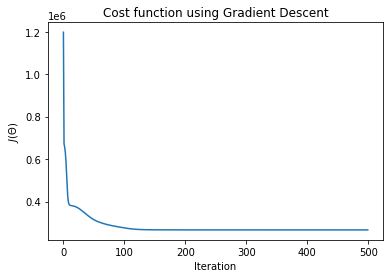

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
p = np.dot(x_up, theta_up.T)

In [17]:
my_predictions = p[:, 0] + ymean
my_predictions = pd.DataFrame(my_predictions)

ff=np.array(movies)[:,np.newaxis]
ff.shape,my_predictions.shape

((1682, 1), (1682, 1))

In [18]:
movies = open(data+'movie_ids.txt', 'r').read().split("\n")[:-1]
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies)[:,np.newaxis])))

In [19]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(10)

,0,1
813,5.010102719871855,"813 Celluloid Closet, The (1995)"
1499,5.010064981638306,1499 Grosse Fatigue (1994)
1188,5.008847384661418,1188 Young Guns II (1990)
1200,5.007100724645479,1200 Kim (1950)
1652,5.0018522910703975,1652 Temptress Moon (Feng Yue) (1996)
1292,5.001810473659554,"1292 Simple Wish, A (1997)"
1535,5.001069952258111,"1535 Enfer, L' (1994)"
1598,5.000016501014316,1598 City of Industry (1997)
1121,4.999126510980699,"1121 Umbrellas of Cherbourg, The (Parapluies d..."
1466,4.998612818282477,1466 Margaret's Museum (1995)


# My Work

In [1]:
import os
from flask_sqlalchemy import SQLAlchemy
from flask import Flask, session
from flask_marshmallow import Marshmallow
from flask_session import Session

app = Flask(__name__)
app.config['SECRET_KEY'] = os.urandom(32)  # os.getenv('SECRET_KEY')
app.config["SESSION_PERMANENT"] = False
app.config["CACHE_TYPE"] = "null"
app.config["SESSION_TYPE"] = "null"
#basedir = os.path.abspath(os.path.dirname(__file__))

# Database
app.config['SQLALCHEMY_DATABASE_URI'] = 'postgresql://{}:{}@{}:{}/{}'.format(os.getenv('POSTGRES_USER'),
                                                                             os.getenv('POSTGRES_PW'),
                                                                             os.getenv('POSTGRES_URL'),
                                                                             os.getenv('POSTGRES_PORT'),
                                                                             os.getenv('POSTGRES_DB'))
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
#Session(app)
session = session

db = SQLAlchemy(app)

### Get User - Movie Matrix

In [6]:
users_query = """SELECT username FROM users"""
users = [g[0] for g in db.session.execute(users_query).all()]

movies_query = """SELECT DISTINCT movie_id FROM movies_user_like ORDER BY movie_id"""
movies = [m[0] for m in db.session.execute(movies_query).all()]

likes_query = lambda username: """SELECT movie_id FROM movies_user_like WHERE username = '{}'""".format(username)
dislikes_query = lambda username: """SELECT movie_id FROM movies_user_dislike WHERE username = '{}'""".format(username)

users_movies = []
user_movie_df_list = []

for user in users:

    user_movies = []
    
    user_likes = [l[0] for l in db.session.execute( likes_query(user) ).all()]
    user_dislikes = [d[0] for d in db.session.execute( dislikes_query(user) ).all()]

    for movie in user_likes:
        user_movie_df_list.append([user,movie,5])
    for movie in user_dislikes:
        user_movie_df_list.append([user,movie,1])


    for movie in movies:
        if movie in user_likes:
            user_movies.append(5)
        elif movie in user_dislikes:
            user_movies.append(1)
        else:
            user_movies.append(0)
    
    users_movies.append(user_movies)

print(users[-1], users_movies[-1])

okeke@gmail.com [5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 5, 5, 5, 5]


In [ ]:
#!pip install scikit-surprise

In [2]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

In [3]:
users_query = """SELECT username FROM users"""
users = [g[0] for g in db.session.execute(users_query).all()]

likes_query = lambda username: """SELECT movie_id FROM movies_user_like WHERE username = '{}'""".format(username)
dislikes_query = lambda username: """SELECT movie_id FROM movies_user_dislike WHERE username = '{}'""".format(username)

user_movie_df_list = []

for user in users:

    
    user_likes = [l[0] for l in db.session.execute( likes_query(user) ).all()]
    user_dislikes = [d[0] for d in db.session.execute( dislikes_query(user) ).all()]

    for movie in user_likes:
        user_movie_df_list.append([user,movie,5])
    for movie in user_dislikes:
        user_movie_df_list.append([user,movie,1])

df = pd.DataFrame(user_movie_df_list, columns = ['userID', 'item', 'rating'])

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'item', 'rating']], reader)

In [7]:
algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8977  0.8379  0.8657  0.8614  0.8669  0.8659  0.0190  
MAE (testset)     0.3828  0.3646  0.3689  0.3670  0.3704  0.3707  0.0063  
Fit time          18.63   18.25   30.06   36.63   23.47   25.41   7.05    
Test time         0.65    0.35    0.46    0.49    0.21    0.43    0.14    


{'test_rmse': array([0.89770158, 0.83794562, 0.86571699, 0.86142091, 0.86686282]),
 'test_mae': array([0.38280022, 0.36456793, 0.36886343, 0.36699464, 0.37041447]),
 'fit_time': (18.632078886032104,
  18.245233058929443,
  30.05882239341736,
  36.62926506996155,
  23.471182346343994),
 'test_time': (0.6465942859649658,
  0.3523104190826416,
  0.4589550495147705,
  0.4928414821624756,
  0.21426844596862793)}

### Populate User Dislike

In [3]:
import random

query = lambda mu: """INSERT INTO movies_user_dislike(movie_id, username) VALUES('{}', '{}')""".format(mu[0],mu[1]);
likes_query = lambda username: """SELECT movie_id FROM movies_user_like WHERE username = '{}'""".format(username)


for user in list(set(users)):

    user_likes = [l[0] for l in db.session.execute( likes_query(user) ).all()]

    distinct_movies = list(set(movies))
    movie_ids = random.sample(range(1,len(distinct_movies)), 20)
    dislike_movies = [distinct_movies[i] for i in movie_ids if distinct_movies[i] != 'not-validated' and distinct_movies[i] not in user_likes]

    for movie in dislike_movies:
        db.session.execute(query([movie,user]))
        db.session.commit()


In [52]:
import random

distinct_movies = list(set(movies))
movie_ids = random.sample(range(1,len(distinct_movies)), 5)
dislike_movies = [distinct_movies[i] for i in movie_ids]
dislike_movies

['tt17044594', 'tt4998632', 'tt7716056', 'tt6456318', 'tt13247118']